In [21]:
## This is a simple stock market forcasting using linear regression. 

In [22]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader.data as web

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm

In [23]:
#df = quandl.get("WIKI/CAR")


In [24]:
start = datetime.datetime(2000,1,1)
end = datetime.date.today()

stock = web.DataReader("AMD", "morningstar")
stock.tail()


Close   High    Low   Open    Volume
Symbol Date                                            
AMD    2018-06-28  15.31  15.36  14.75  14.85  48716794
       2018-06-29  14.99  15.49  14.98  15.41  41527791
       2018-07-02  15.16  15.18  14.74  14.80  43398768
       2018-07-03  15.00  15.34  14.96  15.21  32094031
       2018-07-04  15.00  15.00  15.00  15.00         0

In [25]:
df = stock[['Close']]
#df = df[df.columns[0]]
#print(df['close_price'])

In [26]:
forecast_out = int(30)

In [27]:
df['Prediction'] = df[['Close']].shift(-forecast_out) #  label column with data shifted 30 units up
df.tail()
len(df['Close'])

/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


2219

In [28]:
#X = np.array(df.drop(['Prediction'], 1))
X = np.array(df.drop(['Prediction'], 1))

print(X)

[[ 9.68]
 [ 9.7 ]
 [ 9.71]
 ...
 [15.16]
 [15.  ]
 [15.  ]]


In [29]:
X = preprocessing.scale(X)
len(X)

2219

In [30]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

print(X[:10])
print(X_forecast[:10])
len(X)

[[0.94209168]
 [0.94762709]
 [0.95039479]
 [0.91164695]
 [0.88396993]
 [0.87289912]
 [0.79263574]
 [0.65701831]
 [0.79540344]
 [0.7538879 ]]
[[1.97444476]
 [2.01042489]
 [2.01042489]
 [1.96060624]
 [2.08792056]
 [2.06301124]
 [2.24844732]
 [2.37299393]
 [2.37299393]
 [2.59994555]]


2189

In [31]:
y = np.array(df['Prediction'])
one = len(y)
y = y[:-forecast_out]
two = len(y)
print(one)
print(two)
print(y)

2219
2189
[ 7.87  7.87  8.06 ... 15.16 15.   15.  ]


In [32]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)


In [33]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.8734130735925624


In [34]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[13.34651978 13.47373553 13.47373553 13.29759064 13.74773869 13.65966624
 14.31531666 14.75567887 14.75567887 15.55811669 14.79482218 15.14711195
 15.61683165 15.73426157 16.19419545 16.12569466 16.2137671  16.96727578
 16.55627105 16.38991199 15.53854503 15.68533244 15.01011037 15.39175763
 14.8731088  15.20582692 14.89268045 15.05903951 14.90246628 14.90246628]


In [35]:
import matplotlib.pyplot as plt


In [38]:
plt.plot(forecast_prediction)

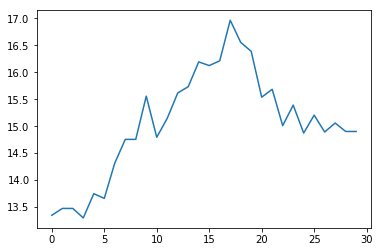

In [39]:
plt.show()